In [80]:
import numpy as np
from astropy.table import Table
from astropy.io import fits
from scipy.stats import binned_statistic_dd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib as mpl
import cmasher as cmr
from exod.post_processing.rotate_regions import rotate_position

In [83]:
path = '../data/processed/0001730201/P0001730201PNU002PIEVLI0000_FILT.fits'
hdul  = fits.open(path)
angle = hdul[0].header['PA_PNT']
tab   = Table(hdul[1].data)

x = np.array(tab['X'])
y = np.array(tab['Y'])
x = x[x!=-99999999]
y = y[y!=-99999999]


x,y = rotate_position(x,y,angle)

xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()

xbins = np.arange(xmin, xmax, 80)
ybins = np.arange(ymin, ymax, 80)

res = binned_statistic_dd(sample=[x,y], values=None, statistic='count', bins=[xbins, ybins])
im = res[0]

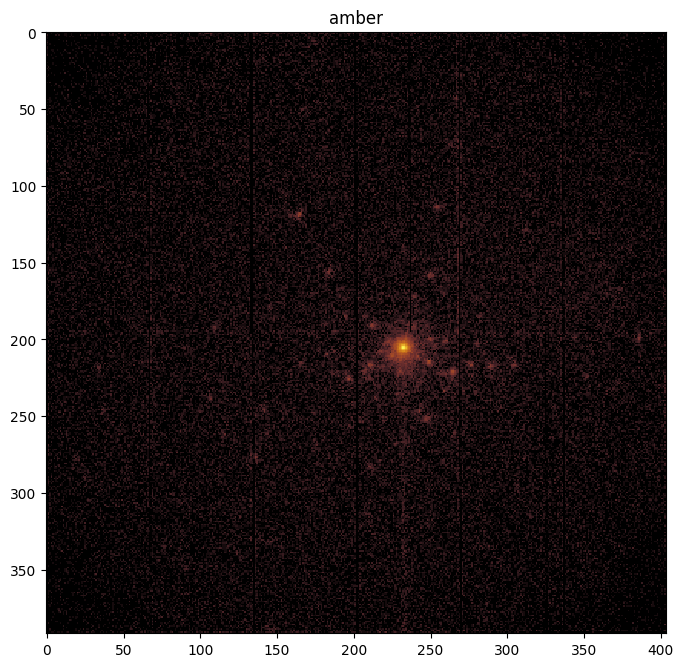

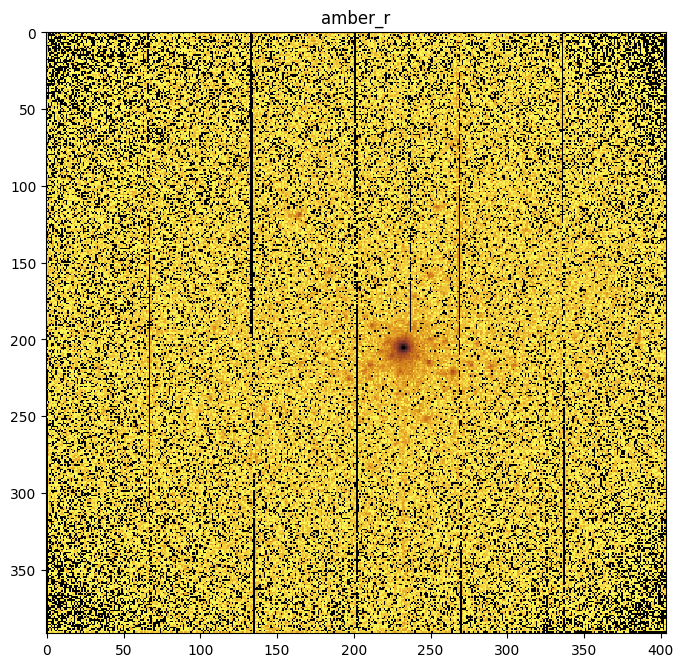

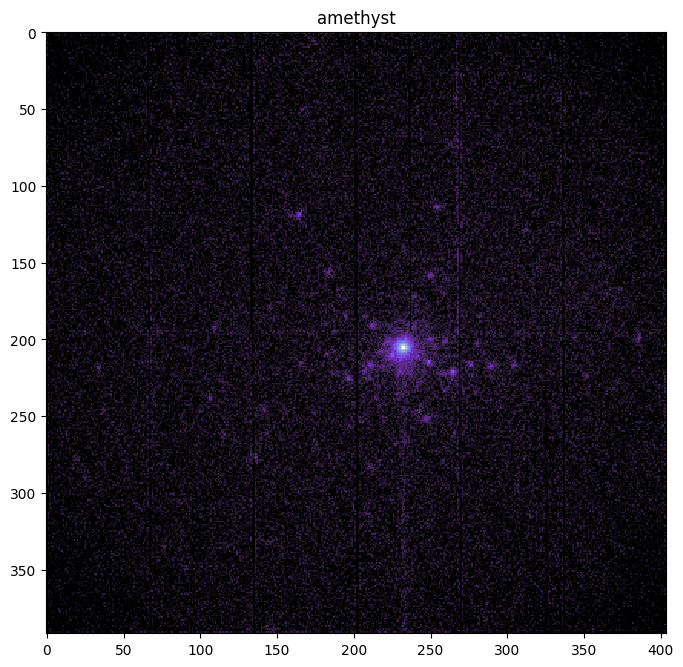

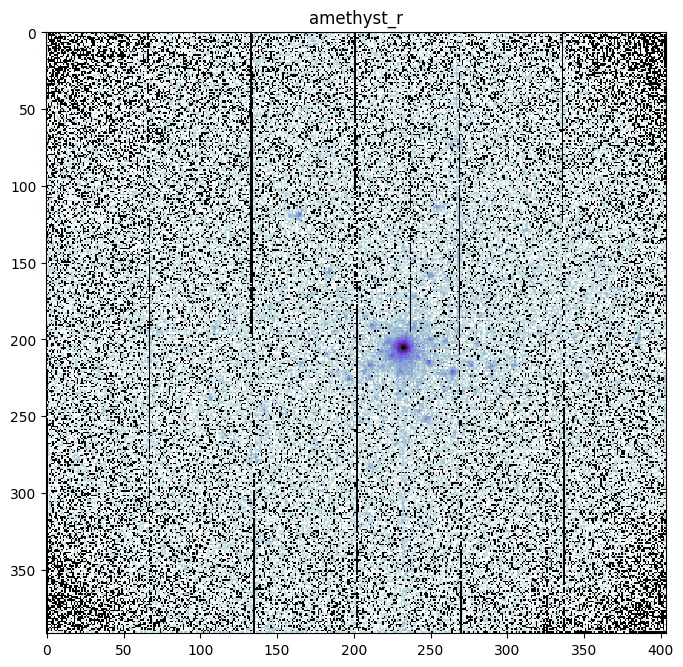

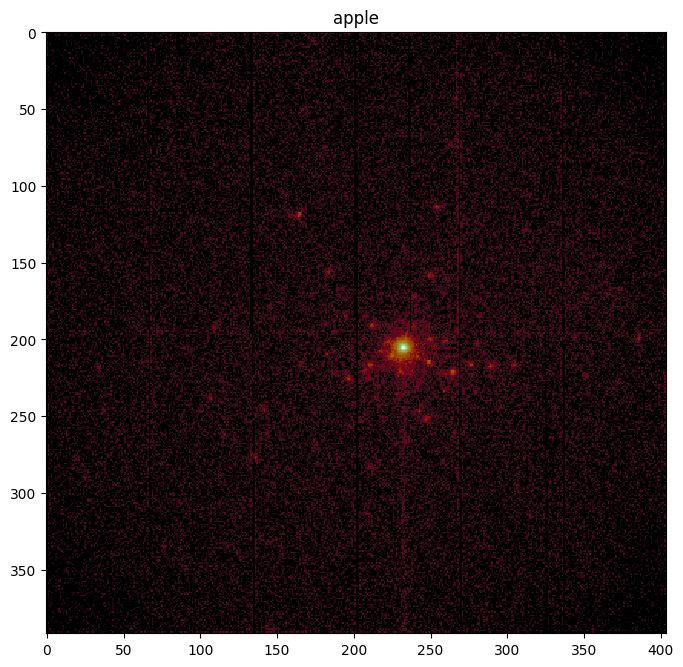

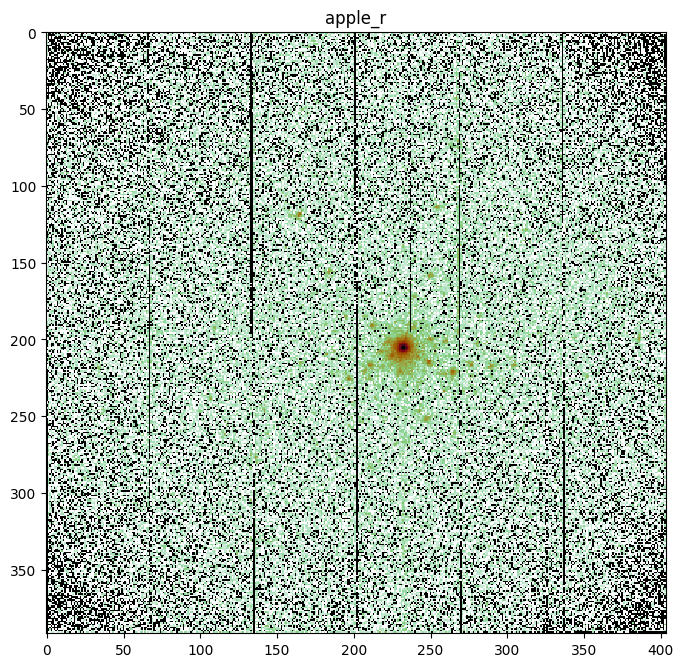

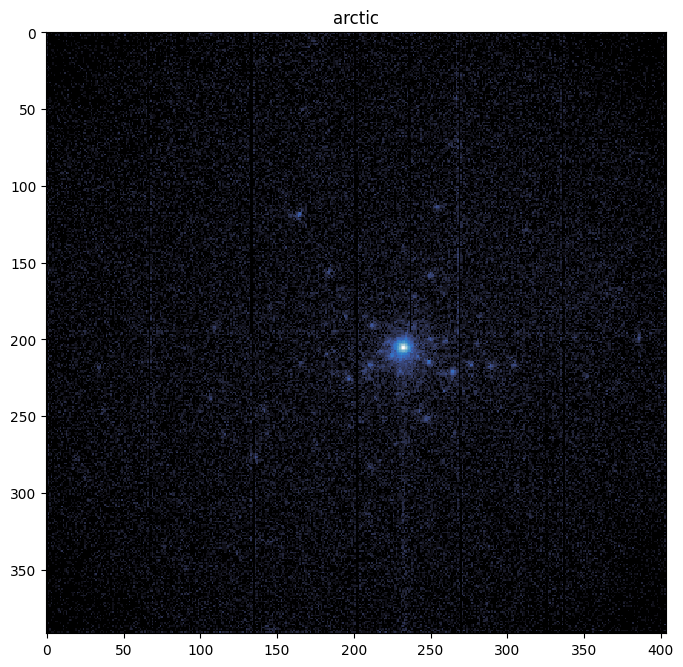

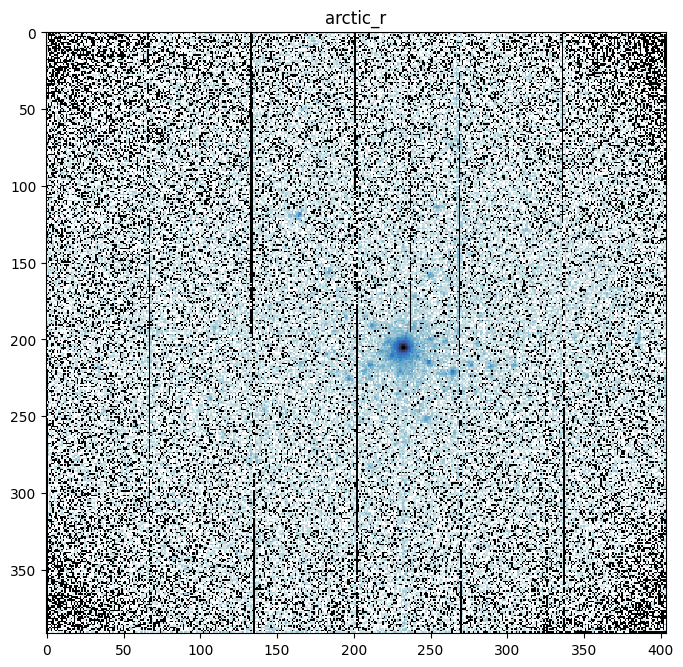

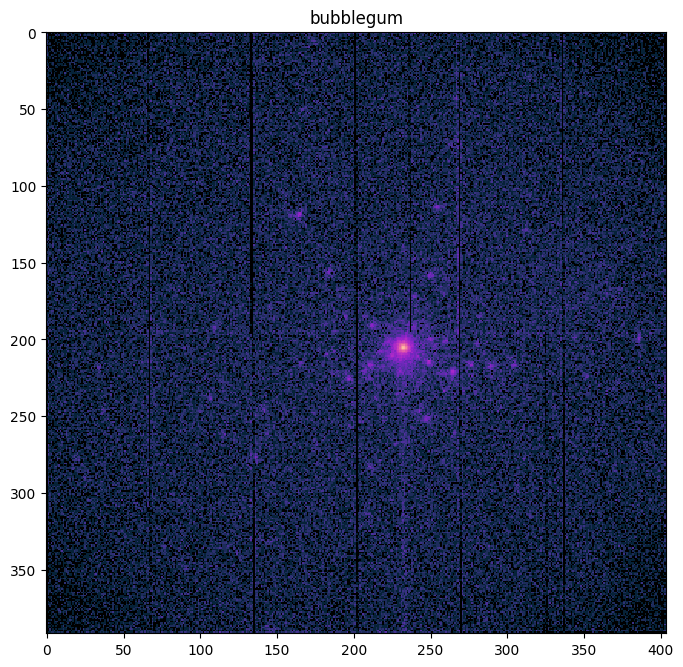

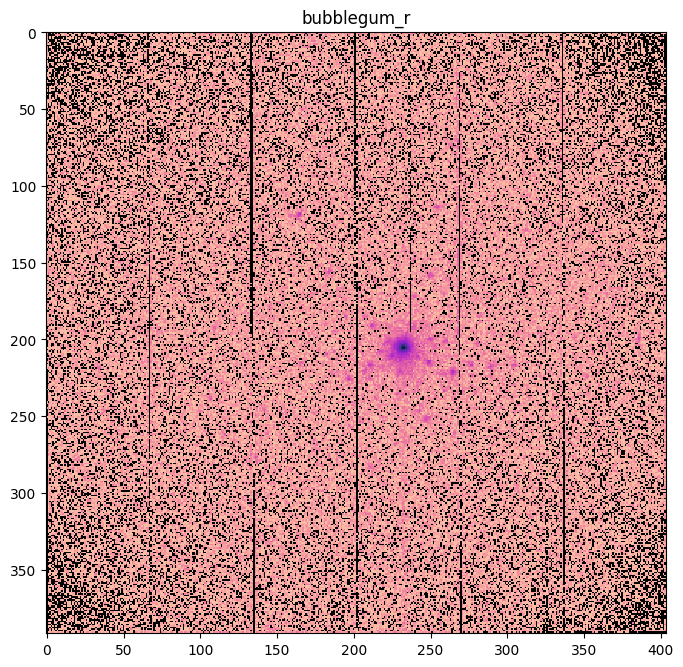

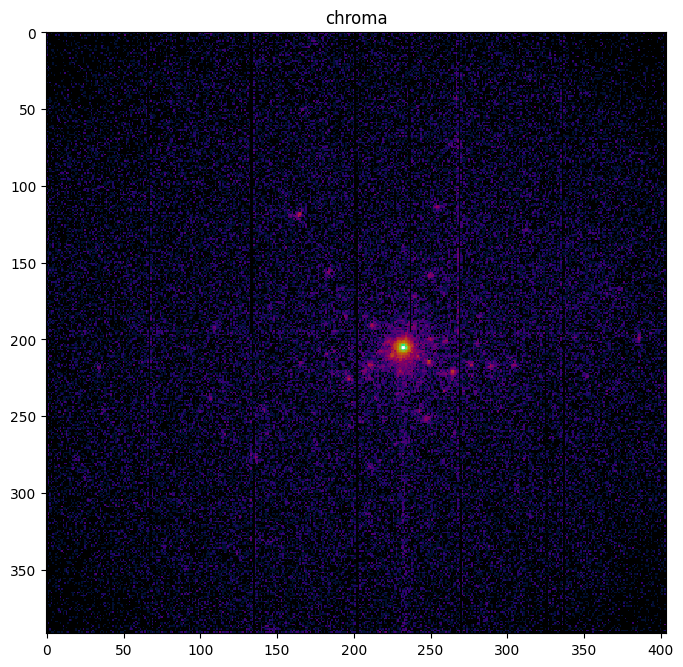

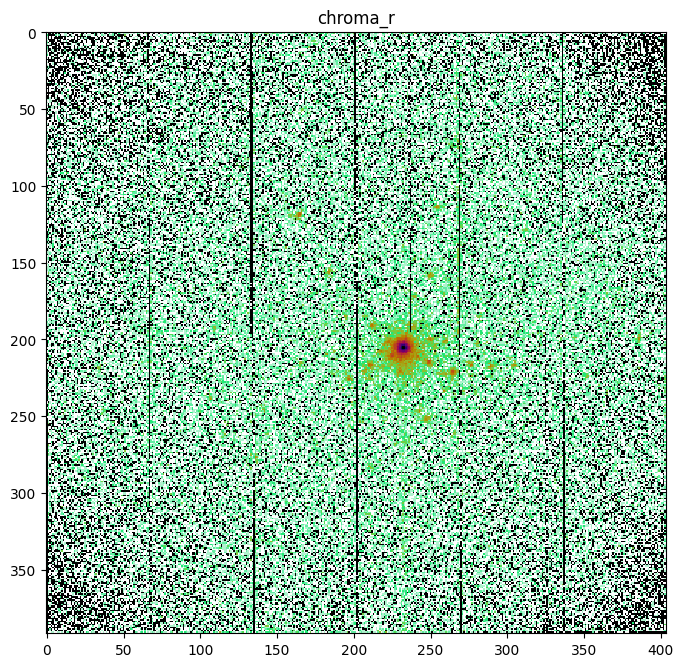

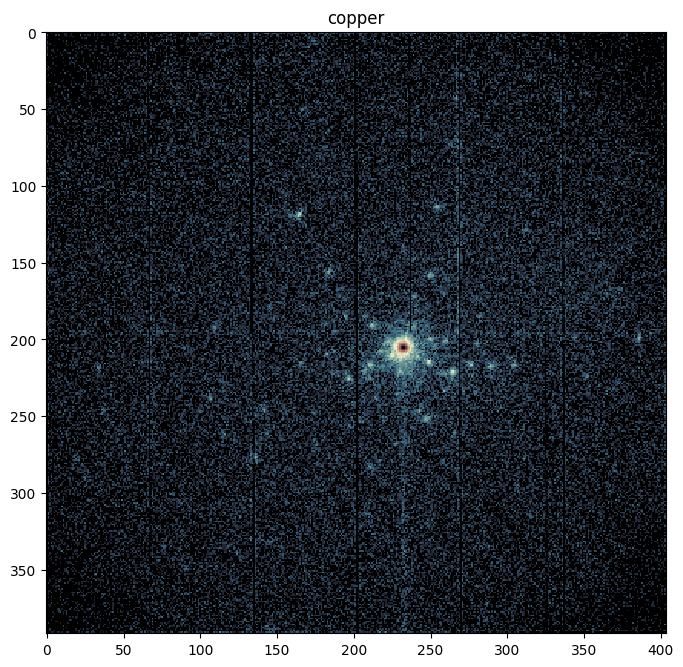

Traceback (most recent call last):
Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt: 
  File "/home/nkhan/EXOD2/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_20621/301593601.py", line 18, in <module>
    plt.show()
  File "/home/nkhan/EXOD2/venv/lib/python3.12/site-packages/matplotlib/pyplot.py", line 612, in show
    return _get_backend_mod().show(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/nkhan/EXOD2/venv/lib/python3.12/site-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/home/nkhan/EXOD2/venv/lib/python3.12/site-packages/IPython/core/display_functions.py", line 298, in display
    format_dict, md_dict = format(obj, include=in

KeyboardInterrupt: 

In [84]:
cs = ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
cs = ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                      'turbo', 'nipy_spectral', 'gist_ncar']
cs = cmr.get_cmap_list()

for c in cs:
    #cmap = mpl.colormaps.get_cmap(c)
    #cmap = cmr.get_cmap(c)
    cmap = cmr.cm.cmap_d[c]
    cmap.set_bad('black')
    plt.figure(figsize=(8,8))
    plt.title(c)
    plt.imshow(im, norm=LogNorm(), interpolation='none', cmap=cmap)
    plt.show()